In [1]:
import mysql.connector as conn
import pandas as pd

In [2]:
mydb1 = conn.connect(host="localhost", user="root", passwd="root",auth_plugin='mysql_native_password')


In [3]:
mydb1

In [4]:
cursor = mydb1.cursor()

In [6]:
cursor.execute("create database Population_DB")


In [7]:
# reading a csv and inserting into database as table
import pandas as pd
df = pd.read_csv("country_lookup.csv")
df


,country,country_code_3_digit,continent,population
0,Aruba,ABW,America,106766
1,Afghanistan,AFG,Asia,38928341
2,Angola,AGO,Africa,32866268
3,Anguilla,AIA,America,15002
4,Albania,ALB,Europe,2862427
...,...,...,...,...
203,Vietnam,VNM,Asia,97338583
204,Yemen,YEM,Asia,29825968
205,South Africa,ZAF,Africa,59308690
206,Zambia,ZMB,Africa,18383956


In [8]:
# Replace 'nan' values with None
df = df.where(pd.notnull(df), None)


In [10]:
create_table_query = """
CREATE TABLE Population_DB.population (
    country VARCHAR(50),
    country_code_3_digit VARCHAR(50),
    continent VARCHAR(50),
    population BIGINT
)
"""
cursor.execute(create_table_query)
mydb1.commit()

print("DONE")

DONE


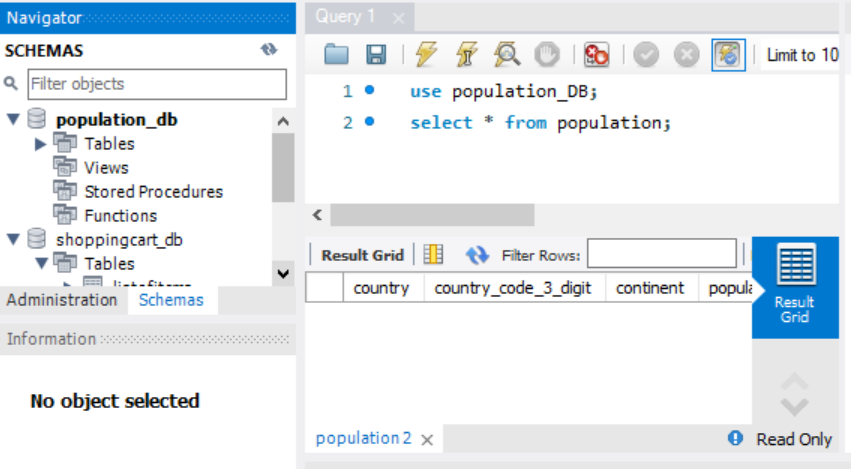

In [11]:
# Insert data from DataFrame into the 'country1' table
for _, row in df.iterrows():
    country = row['country']
    country_code_3_digit = row['country_code_3_digit']
    continent = row['continent']
    population = row['population']

    # SQL query to insert data into the 'country1' table
    insert_query = "INSERT INTO population_DB.population (country, country_code_3_digit, continent, population) VALUES (%s, %s, %s, %s)"
    values = (country, country_code_3_digit, continent, population)

    # Execute the SQL query
    cursor.execute(insert_query, values)

# Commit the transaction
mydb1.commit()
print("DONE")


DONE


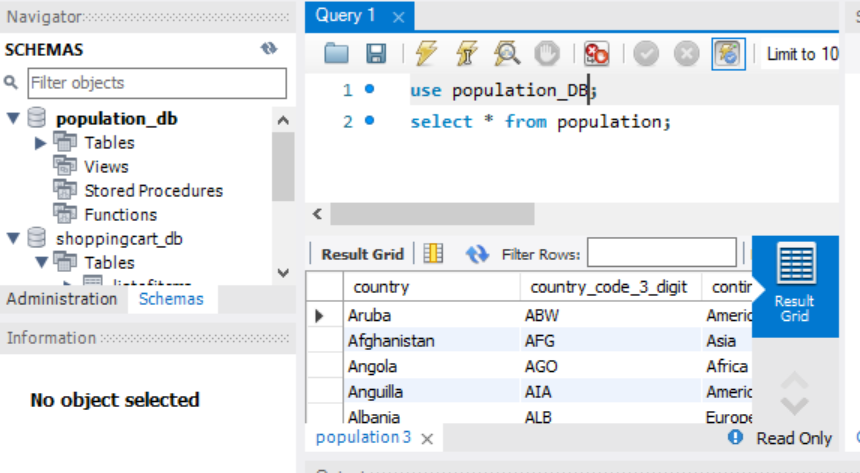